In [1]:
# import necessary libraries
import numpy as np
import pandas as pd


In [2]:
S= pd.read_csv(r'C:\Users\olsag\Downloads\Stores.csv')
S


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [4]:
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [7]:
S.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [8]:
S.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [9]:
S.shape

(896, 5)

In [10]:
S.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


#### NO 1 INSIGHT : If number of customers influence the Sales Rate

In [26]:
d= S.groupby(['Daily_Customer_Count'])['Store_Sales'].max().sort_values(ascending=False).head(5)
d
 

Daily_Customer_Count
860     116320
980     105150
680     102920
1310    102310
820     101820
Name: Store_Sales, dtype: int64

##### OBSERVATION 1
The above analysis inferred that the 860customers pull 116320sales,while there is higher number of customers like 1310customers with lesser Sale.So, this implies that the Store sales does not depend on the number of customer.

##### NO 2 INSIGHT : If Availability of items in the Store influence the Sales Rate

In [29]:
I= S.groupby(['Items_Available'])['Store_Sales'].max().sort_values(ascending=False).head(10)
I


Items_Available
2414    116320
2104    105150
1638    102920
1587    102310
1758    101820
1374    101780
1854    100900
1763     99570
1858     99480
2158     98260
Name: Store_Sales, dtype: int64

##### OBSERVATION  2
The availability of items in each store does not have any impact on the sales of each given Store

##### NO 3 INSIGHT : If  Size of the Store influence the Sales Rate

In [42]:
STORE= S.groupby(['Store_Area'])['Store_Sales'].min().sort_values(ascending=True).head(10)
STORE

Store_Area
1250    14920
1477    16370
1537    17670
1624    20270
1397    21300
1445    21470
1876    21650
1572    21750
1583    21830
1461    22310
Name: Store_Sales, dtype: int64

###### OBSERVATION 3
Few store with large size have high sale while some store with small size also meet up with the high sales.The size of the store(Store_Area) has no effect on the Sale Rate.

##### NO 4 INSIGHT : The comparism

In [50]:
R= S.groupby(['Items_Available','Store_Area'])['Store_Sales'].min().astype('int64').unstack('Store_Area').head(10)
R

Store_Area,775,780,854,869,891,896,902,913,919,932,...,2015,2019,2026,2044,2049,2063,2067,2169,2214,2229
Items_Available,,,,,,,,,,,,,,,,,,,,,
932,42530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,NaN,25600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1018,NaN,NaN,77740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050,NaN,NaN,NaN,52540.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,NaN,NaN,NaN,NaN,NaN,75110.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,NaN,NaN,NaN,NaN,67370.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1087,NaN,NaN,NaN,NaN,NaN,NaN,56820.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,NaN,NaN,NaN,NaN,NaN,NaN,64640.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73810.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### OBSERVATION 4
The size of store affect items availabily i.e the capacity store base on the size but the two have no effect on the Sale rate.

##### NO 5 INSIGHT : The Relationship or association amount the store variables

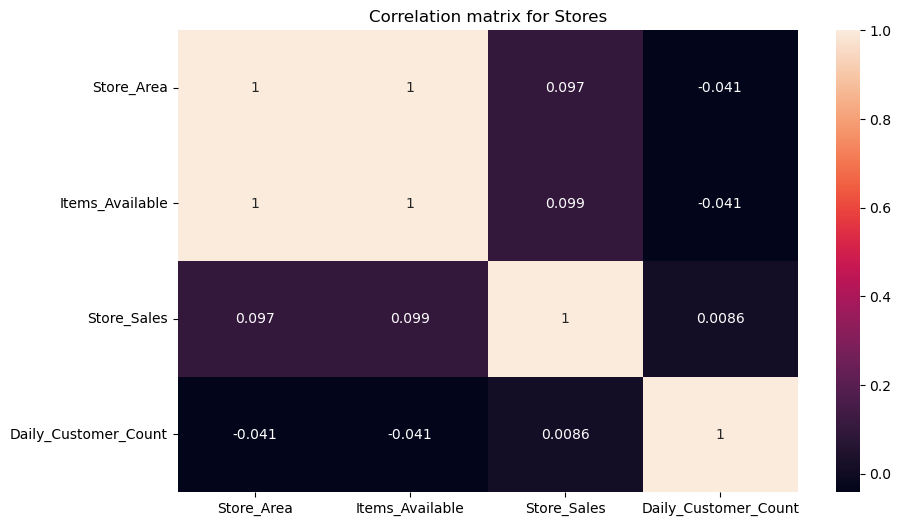

In [49]:
# select numerical columns
num_cols = ['Store_Area', 'Items_Available', 'Store_Sales', 'Daily_Customer_Count']

# calculate the correlation matrix
corr_matrix = S[num_cols].corr()

# visualize the correlation matrix with heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation matrix for Stores')
plt.show()

#### OBSERVATION 5
The relationship only exist between item available and Store area which is Strong.The larger the Store, the high the capacity.there is no more relationship among the other variables.

### RECOMMENDATION
Since the Variables have no effect on the sales.The supermarket owners with low Profits should have a view on other points or sources of improving their sales with inturns increase the Profits.Other Points may be Advertisement,changing of Store location, good customer relation.